In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ripple_detection import Karlsson_ripple_detector, Kay_ripple_detector

# Load LFP data

In [3]:
# #------------------------------------------------------------------------------
# # load data from S1 data file 
# #------------------------------------------------------------------------------
import pickle
from matplotlib import pyplot as plt
import os
import IPython as ipy
import pickle as pkl
import scipy.signal as ss
import scipy.io as sio
import numpy as np
import mat73

from scipy.signal import butter, lfilter
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

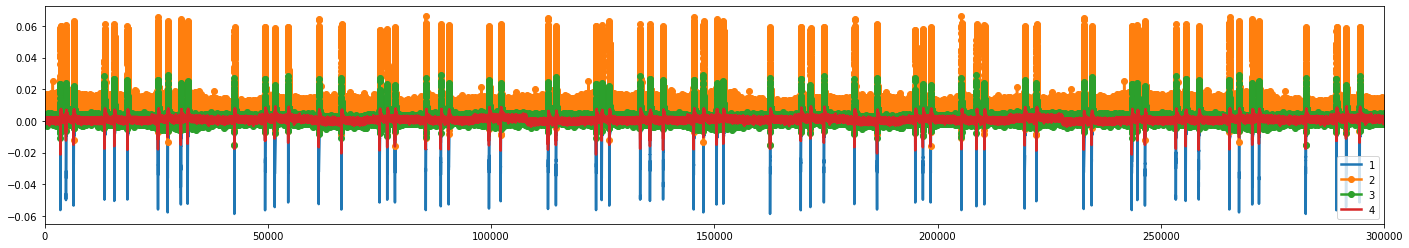

In [4]:
V = {}
for el in range(4):
    V[el] = []

dirname = '/home/fernando/Dropbox/SUNY/2023/v105/'

vname = 'v105_batch1'
bseed = 0

for vname in ['v105_batch1','v105_batch1']:
    
    for bseed in range(10):
        
        with open(dirname+vname+'/'+vname+'_'+str(bseed)+'_data.pkl', 'rb') as fileObj: S1Data = pickle.load(fileObj)    

        for t in range(6000-1,30000-1):
            for el in range(4):
                if abs(S1Data['simData']['LFP'][t][el]) < 0.00001:
                    xt = (S1Data['simData']['LFP'][t-1][el]+S1Data['simData']['LFP'][t+1][el])/2.0
                    V[el].append(xt)   
                else:
                    V[el].append(S1Data['simData']['LFP'][t][el])   


for vname in ['v105_batch1']:
    
    for bseed in range(5):
        
        with open(dirname+vname+'/'+vname+'_'+str(bseed)+'_data.pkl', 'rb') as fileObj: S1Data = pickle.load(fileObj)    

        for t in range(6000-1,30000-1):
            for el in range(4):
                if abs(S1Data['simData']['LFP'][t][el]) < 0.00001:
                    xt = (S1Data['simData']['LFP'][t-1][el]+S1Data['simData']['LFP'][t+1][el])/2.0
                    V[el].append(xt)   
                else:
                    V[el].append(S1Data['simData']['LFP'][t][el])   


            
            
            
timeRange = [0, 300000]
recordStep = 0.5
t = np.arange(timeRange[0], timeRange[1], recordStep) 

plt.figure(figsize=(24,4))
fontSize = 12
lw = 1

plt.plot(t,V[0], '-', linewidth=2.5, label='1')
plt.plot(t,V[1], '-o', linewidth=2.5, label='2')
plt.plot(t,V[2], '-o', linewidth=2.5, label='3')
plt.plot(t,V[3], '-', linewidth=2.5, label='4')
plt.xlim(0,300000);
# plt.xlim(1500,2500);
plt.legend();

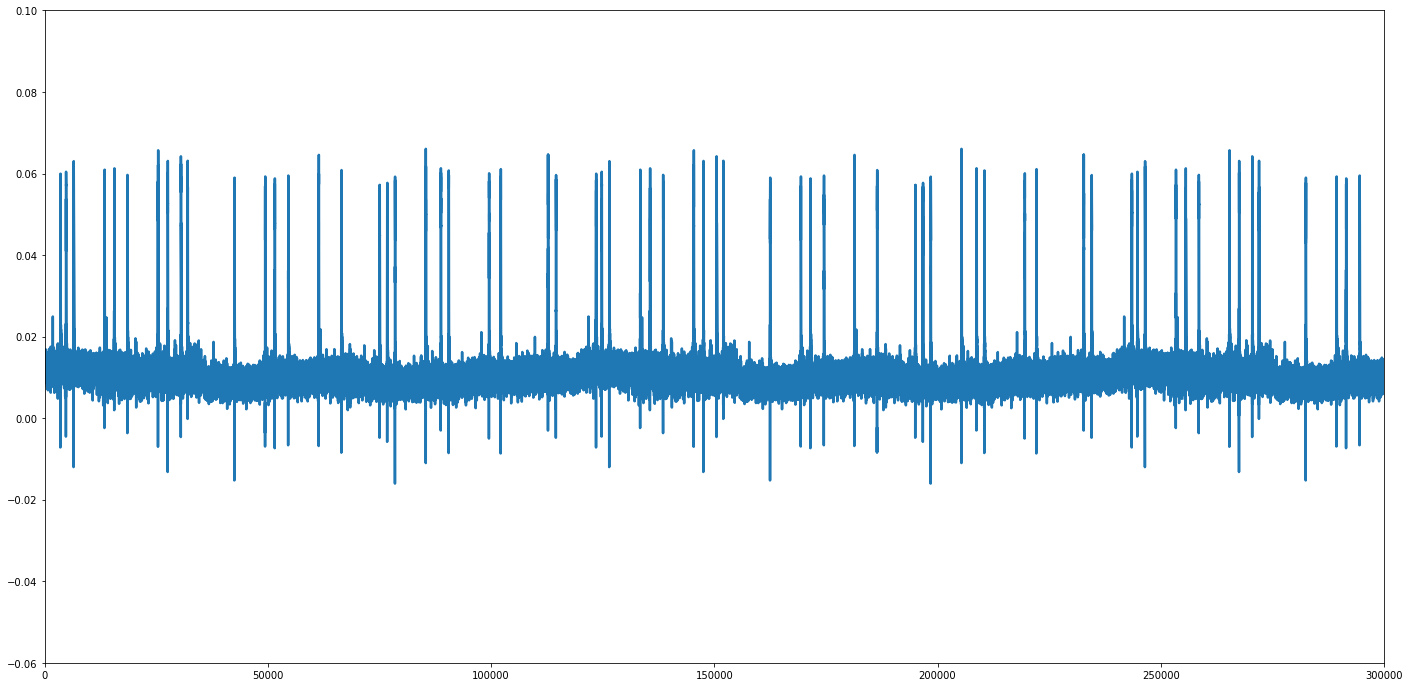

In [5]:
plt.figure(figsize=(24,12))
fontSize = 12
lw = 1

# plt.subplot(4,1,1)
# plt.plot(t,V[0], '-', linewidth=2.5, label='1')
# plt.xlim(0,300000);
# plt.ylim(-0.06,0.1);
# plt.legend();
# plt.subplot(4,1,2)
plt.plot(t,V[1], '-', linewidth=2.5, label='2')
plt.xlim(0,300000);
plt.ylim(-0.06,0.1);
# plt.legend();
# plt.subplot(4,1,3)
# plt.plot(t,V[2], '-', linewidth=2.5, label='3')
# plt.xlim(0,300000);
# plt.ylim(-0.06,0.1);
# plt.legend();
# plt.subplot(4,1,4)
# plt.plot(t,V[3], '-', linewidth=2.5, label='4')
# plt.xlim(0,300000);
# plt.ylim(-0.06,0.1);
# plt.legend();

In [6]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def notch_filter(samp_freq,notch_freq,quality_factor,time,x):
    # Set time vector
    n = time
    noisySignal = x    
    b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
    freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)    
    # Apply notch filter to the noisy signal using signal.filtfilt
    outputSignal = signal.filtfilt(b_notch, a_notch, noisySignal)    
    return outputSignal

In [7]:
lfps = []
fs = 2000.0
lowcut = 20.0
highcut = 500.0

for mat_fnumber in range(4):
        
    y2 = butter_bandpass_filter(V[mat_fnumber], lowcut, highcut, fs, order=5)
    
    lfps.append(y2)

## Many LFPs, only two LFPs with ripples

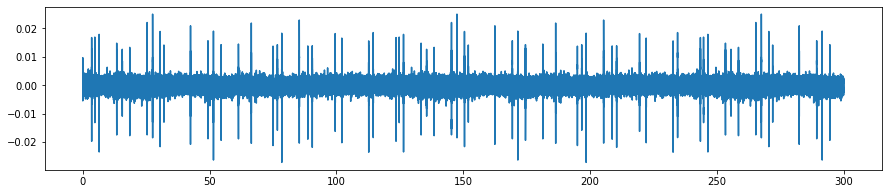

In [8]:
lfps2 = np.stack(
    (
#         lfps[0],
        lfps[1],
#         lfps[2],
#         lfps[3],
#         lfps[4],
#         lfps[5],
#         lfps[6],
#         lfps[7],
    ),
    axis=1,
)


fs = 2000.0

time = np.linspace(0, np.size(V[0])/fs, np.size(V[0]))

fig, ax = plt.subplots(figsize=(15, 3))
ax.plot(time, lfps2)
speed = np.ones_like(time)


In [9]:
from ripple_detection import filter_ripple_band

SAMPLING_FREQUENCY = fs

In [10]:
filtered_lfps = filter_ripple_band(lfps2)
Karlsson_ripple_times = Karlsson_ripple_detector(
    time, filtered_lfps, speed, SAMPLING_FREQUENCY
)

display(Karlsson_ripple_times)

,start_time,end_time
ripple_number,,
1,3.441006,3.557006
2,6.430511,6.511011
3,13.328022,13.448022
4,15.508526,15.566526
5,15.569026,15.604026
...,...,...
62,271.963453,272.063453
63,282.449471,282.558471
64,289.283482,289.420482


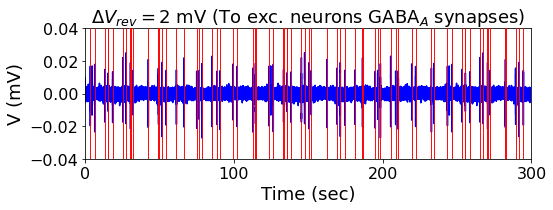

In [11]:
plt.figure(figsize=(8,2.4))

plt.title(r'$\Delta V_{rev} = 2$ mV (To exc. neurons GABA$_A$ synapses)', fontsize=18)

for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.93, color="red", zorder=1000)

plt.plot(time, lfps2,'b')
plt.xlim(0,300)
plt.ylim(-0.04,0.04);

plt.yticks([-0.04,-0.02, 0 , 0.02,0.04], fontsize=16)
plt.xticks([0, 100, 200, 300], fontsize=16)
plt.ylabel('V (mV)', fontsize=18)
plt.xlabel('Time (sec)', fontsize=18)

plt.savefig('LFP_FR_DeltaVrev_2mV_exc.png', facecolor = 'white', bbox_inches='tight' , dpi=300)


In [19]:
for ii in range(1,67):
    print('%d \t\t %.3f \t\t %.3f \t\t %.3f' % 
          (ii,Karlsson_ripple_times['end_time'][ii]-Karlsson_ripple_times['start_time'][ii], Karlsson_ripple_times['start_time'][ii],Karlsson_ripple_times['end_time'][ii]))

1 		 0.116 		 3.441 		 3.557
2 		 0.081 		 6.431 		 6.511
3 		 0.120 		 13.328 		 13.448
4 		 0.058 		 15.509 		 15.567
5 		 0.035 		 15.569 		 15.604
6 		 0.116 		 18.449 		 18.564
7 		 0.129 		 25.305 		 25.434
8 		 0.083 		 27.510 		 27.593
9 		 0.123 		 30.427 		 30.549
10 		 0.100 		 31.963 		 32.063
11 		 0.109 		 42.449 		 42.558
12 		 0.137 		 49.283 		 49.420
13 		 0.099 		 51.474 		 51.573
14 		 0.152 		 54.436 		 54.588
15 		 0.108 		 61.331 		 61.438
16 		 0.081 		 66.430 		 66.510
17 		 0.098 		 74.970 		 75.067
18 		 0.081 		 76.682 		 76.763
19 		 0.136 		 78.387 		 78.522
20 		 0.099 		 85.325 		 85.424
21 		 0.099 		 88.686 		 88.785
22 		 0.128 		 90.395 		 90.523
23 		 0.112 		 99.456 		 99.568
24 		 0.090 		 102.099 		 102.189
25 		 0.128 		 112.668 		 112.796
26 		 0.165 		 114.416 		 114.581
27 		 0.116 		 123.441 		 123.557
28 		 0.081 		 126.431 		 126.511
29 		 0.120 		 133.328 		 133.448
30 		 0.058 		 135.509 		 135.567
31 		 0.035 		 135.569 		 135.604
32 		

(147.4, 147.65)

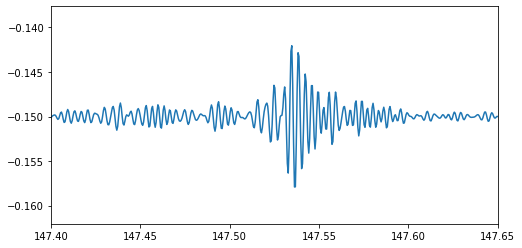

In [47]:
plt.figure(figsize=(8,4))
# plt.plot(time, V[0])
# plt.plot(time, V[1])
# plt.plot(time, V[2])
# plt.plot(time, V[3])
# plt.plot(time, lfps[1]-0.1)
plt.plot(time, filtered_lfps-0.15)


# plt.ylim(-0.015,0.015);
plt.xlim(147.4, 147.65)
# plt.xlim(144.5, 153.5)

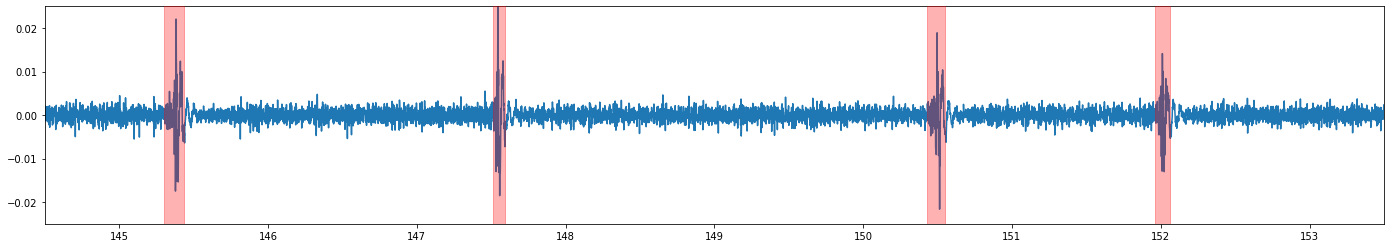

In [12]:
plt.figure(figsize=(24,4))
plt.plot(time, lfps2)
for ripple in Karlsson_ripple_times.itertuples():
    plt.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)

plt.xlim(144.5, 153.5)
plt.ylim(-0.025,0.025);

In [19]:
# Kay_ripple_times = Kay_ripple_detector(time, filtered_lfps, speed, SAMPLING_FREQUENCY)

# display(Kay_ripple_times)

# fig, ax = plt.subplots(figsize=(15, 3))
# ax.plot(time, lfps2)
# for ripple in Kay_ripple_times.itertuples():
#     ax.axvspan(ripple.start_time, ripple.end_time, alpha=0.3, color="red", zorder=1000)

# # plt.xlim(1.5,2.5)
# plt.ylim(-0.05,0.06);